# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [7]:
features.shape

(489, 3)

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
print(np.max(prices))
print(np.min(prices))
print(np.mean(prices))
print(np.median(prices))
print(np.std(prices))

1024800.0
105000.0
454342.944785
438900.0
165171.131544


In [14]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
# RM:
<hr/>
   ## Intuition
   As per my intuition 'MEDV' should increase if 'RM' increases and vice versa.
   ## Justification
   'RM' could indicate that the house has more area. Because more area is required to build more rooms and area is directly perportnal to the cost. More room also indicates that it is possilbe to use this house in multiple ways like childern can have a seperate study room.
# LSTAT:
<hr/>
## Intuition
As house prices also depends on the social environment in that locality, higher value of 'LSTAT' should indicate lower house price. 
## Justification
Poverty could be a possilbe reason of crime. And having a house in a socity where there is a high risk of crime is not a good thing.
# PTRATIO:
<hr/>
## Intuition
As 'PTRATIO' ratio will increase house price should goes down.
## Justification
If there are less teachers in the location for the students it means two things. Either there is not sufficient infrastructure for schools and teachers. Second to have good quality of education students might need to go far away from the house.
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [15]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
As in this case R^2 value is quite <span style="background-color: yellow;">high</span> (92.3%) so the model is very good. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [16]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation  import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2,random_state = 6969)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


In [17]:
print('X_train.shape '+str(X_train.shape))
print('y len '+str(len(y_train)))

print('X_train.shape '+str(X_test.shape))
print('y len '+str(len(y_test)))

print('Train/Test ratio is '+str(float(len(y_train))/float(len(prices))))

X_train.shape (391, 3)
y len 391
X_train.shape (98, 3)
y len 98
Train/Test ratio is 0.799591002045


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
# Benefit
- We want to messure accuracy of prediction. In another words we want to messure acccuracy of model for the data which was not there in the learning process.
- We don't want our model to overfit.
- Additionaly we are also considering to fold the data k times so that we can maintaine a desired balance between bias and variance of the model.
- Ignoring the risk of overfiting on data with high number of independent variables.

# What could go wrong
###### with not having a way to test your model
It might be cheating if I say *<strong>What could go wrong = -1 &#9733; (Benefit)</strong>*
- No way to figure out what would be the accuracy of our model on future data.
- We will not be able to decide which algo should we use in production environment.
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

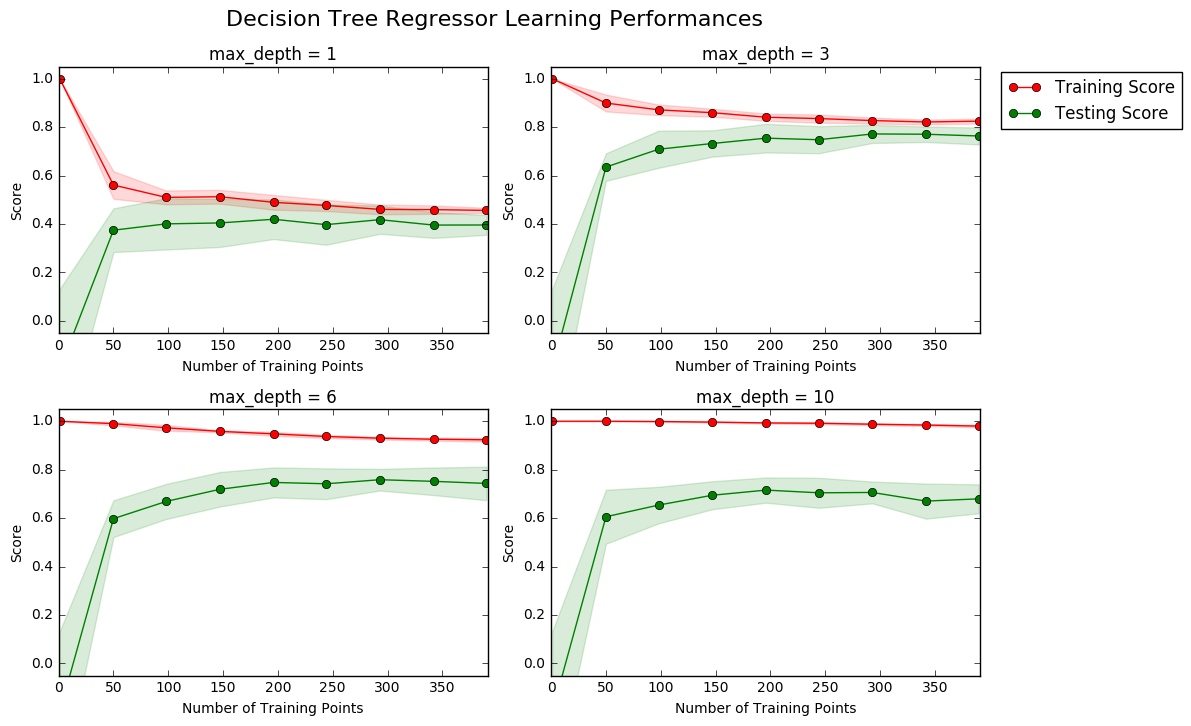

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
# Model with depth = 1
Having depth = 1 is clearly not fitting the data well. So for the given dataset depth = 1 is a wrong value for parameter depth.
This is a case of underfitting model. This is a highly bias model.
## Training Curve
The training curve started from 1 and decreased to 0.57 immediately than it is sticking to a score of about 0.4 and futher not convering. The training curve is not converging at all.The accuracy is around 0.4 which is far away from a good model. Having more datapoints will also not going to help this model fit better.
## Testing Curve
As expected testing curve is not fiting the data. Testing curve started from 0.0 and increased upto 0.4 quickly but after that it's faling into plateau state. Both training and testing curves going upto a maximum of 0.4 accuuracy. More datapoints are not going to help with depth = 1.
# Model with depth = 3
Training and testing curves seems to have good combination of bias and variance. We can see that the accuracy of this model on training and testing data is almost equal. Accuracy is about 0.8 which is quite good.
## Training Curve
Training curve started decreasing and reached 0.9 than slowly it reached to 0.8. Training curve has reached to a stable state (plateau) after 0.8 with 200 datapoints. More data is not helping it furtherd because we can see the curve is not increasing or decreasing much after 200 datapoints.
## Testing Curve
Testing curve is also looks good. Both training and testing curves have almost equal and stable accuracy. From all the given four models it looks like this model is <span style="background-color: yellow;">best</span> fitting our dataset.
# Model with depth = 6
Having depth = 6 is falling into the case of overfitting where we can see high accuracy on training dataset but low accuracy on testing dataset. 
## Training Curve
Accuracy on training data is 0.9. Training curve indicating that model is dooing well and fitting given data more accuratly. It also stopping to converge further after some data points.
## Testing Curve
Accuracy on training data is 0.7. Testing curve is not showing good results because the difference between training and testing datapoints is high enough where we can say that we have started overfitting our model. Testing curve also shows that it's started going down on last datapoints.
# Model with depth = 10
This is worst model to pridict on future data because there is a big difference between training and testing curves.
## Training Curve
Accuracy on training data is 0.9. Training curve hitting hight score.
## Testing Curve
Accuracy on training data is slightly greater than 0.6. Testing curve not fitting the data.
# Would having more training points benefit the model?
As our learning curves are falling into a stable state (plateau) it's not a good idea to have more training points.
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

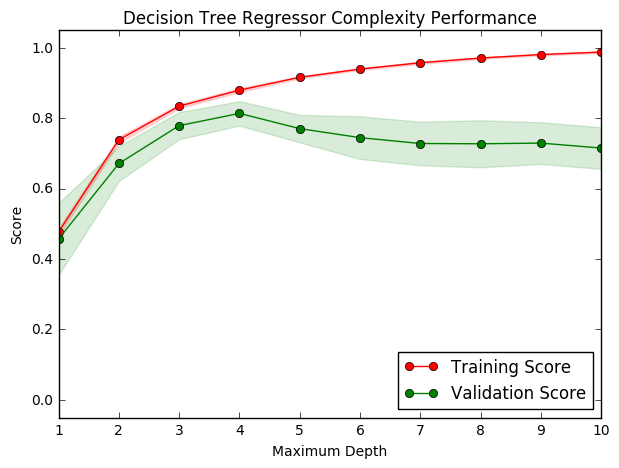

In [9]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
# High bias vs high variance
If modele is too simplified to generalized the data well. Also it means that model is paying less attention to the data and has high SSE or very low R square value.<br/>
On the other hand if we have high gap between training and testing curve and training curve is showing good results but testing curve is not, is a sign of high variance.<br/>
So for the case of 
## Depth = 1
We have high bias. Training Score = ~0.48, Validation Score = ~0.47
## Depth = 10
We have high variance. Training Score = ~1, Validation Score = ~0.7
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
# Best depth   
4
# Why
Because at depth = 5 and onwards we can see high variance as indicated by the curves.
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
# Grid Search technique
Grid search technique is used to try a range of parameters for an estimator. After executing grid search technique we can select the best values of parameters for our model which can be usefull to get most optimized model.
# How to optimize a learning algorithm
To optimize a learning algorithm we have to follow below steps.
- import desired learning algo <br/>
`from sklearn import svm`
- import GridSearchCV<br/>
`from sklearn.model_selection import GridSearchCV`
- Define parameters to tune<br/>
`parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}`
- initialize learning algo
`svr = svm.SVC()`
- pass learner and parameters to tune into GridSearchCV<br/>
`clf = GridSearchCV(svr, parameters)`
- fit the model
`clf.fit(data_points, targetY)`
- get best parameters for your learning algorithm<br/>
`best_params = clf.best_params_`
> For a big dataset we should use RandomizedSearchCV which will try only some numer of parameters to gain performance<br/>
- 
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
#  K-fold cross-validation technique
We will split our dataset into training and learning dataset. Testing dataset could be 20% - 30% of all dataset. Than k-fold cross-validation technique is used to split our training dataset into k fold of equal size. Than learning algorithm will consider every fold k-1 times for training and once for testing dataset while learning. Our model will learn on training dataset by folding it into K fold and finally cross validating it with testing dataset.
# Benefits
Performance will be meassured based on the everage of all training data with k fold.
K-fold technique reduce the variance from our model.
For grid search technique it helps to reduce the variance.
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [19]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=6969)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dp_range = range(1,11)
    params = dict(max_depth = dp_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, cv = cv_sets, scoring = scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [20]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
Maximum depth of optimal model = <span style="background-color: yellow">4</span>

**It's exactly same as my answer for Question 6.**
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [21]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $408,207.69
Predicted selling price for Client 2's home: $231,168.00
Predicted selling price for Client 3's home: $931,445.45


In [33]:
# Status for all features
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
Minimum price: 105,000.00<br/>
Maximum price: 1,024,800.00<br/>
Mean price: 454,342.94<br/>
Median price: 438,900.00<br/>
Standard deviation of prices: 165,340.28<br/>

# Client 1: 408,207.69 [5, 17,15]
Prediction for client 1 seems to be good because number LSTAT and PTRATIO are below average in this area.
# Client 2: 231,168.00 [4,32,22]
For this house RM is small. LSTAT and PTRATIO ratio is high so it's natural that this house has low price.
# Client 3: 931,445.45 [8, 3, 12]
For Client 3 all features are good. RM is more, LSTAT and PTRATIO is very less. So for this localtion high price are expected. 

Based on the prediction results our model seems to be doing a good job for prediction.

<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [34]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>
# How relevant today is data that was collected from 1978?<br/>
Data should be not be relevant because all of features could have been changed sice 1978.
# Are the features present in the data sufficient to describe a home?<br/>
No, it would be better if we can have more features like following.
- Distance from Bus station
- Distance from Railway station
- Distance from City X, Y and Z
- Distance from industrial area
- Number of balcony
- Number of bathrooms
- Number of bedrooms etc.
# Is the model robust enough to make consistent predictions?<br/>
For the given dataset our model with depth = 4 is doing good job. But if we could have more features like mentioned above we could have more consistent results.
# Would data collected in an urban city like Boston be applicable in a rural city?<br/>
As rular there is a lot of difference between rular area and urban area I think data collected in urban city can't be applicable in rular area. There are different reasons why people lives in rular area and urban area. <br/>
<span style="background-color: yellow">Example</span><br/>
A feature like "Distance from some industry" could have different effect on house price. In case of urban it might be a good thing so house price can go high but in case of rular it might decrease the house price.
<hr style=" height: 5px;   border-style: solid;   border-color: #8c8b8b;   border-width: 1px 0 0 0;   border-radius: 20px; "/>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.